## Цель работы: проверить, есть ли зависимость между балом ЗНО студентов и их рейтингом в университете

Для работы использованы данные рейтинга студентов на бюджете 1-го курса КПИ факультета ФИВТ, взятые отсюда: [ссылка](https://dnvr.kpi.ua/wp-content/uploads/2021/02/2020-2021-1-%D0%A0%D0%B5%D0%B9%D1%82%D0%B8%D0%BD%D0%B3-%D0%A4%D0%86%D0%9E%D0%A2.pdf)

Баллы ЗНО этих студентов получены с сайта https://abit-poisk.org.ua/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Импортируем данные о рейтинге в университете студентов 126-й специальности

In [2]:
rating_126 = pd.read_excel("rating_126.xlsx")

In [3]:
rating_126.head()

,ПІБ,Група,Код спец.,Сер. бал,Дод. бал,Рейтинг *
0,Лінчук Анастасія Вадимівна,ІК-02,126,99.00,NaN,94.05
1,Крамар Анна Петрівна,ІК-02,126,98.83,NaN,93.89
2,Гацан Сергій Юрійович,ІК-01,126,98.67,NaN,93.73
3,Омельченко Анна Юріївна,ІК-01,126,95.50,60.0,93.73
4,Андреєв Андрій Олександрович,ІА-02,126,96.83,NaN,91.99


In [4]:
rating_126.rename(columns={"Рейтинг *":"rating"}, inplace=True)

Распределение баллов по специальности

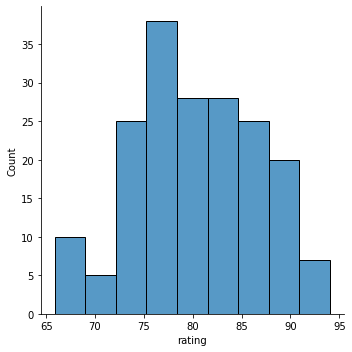

In [5]:
sns.displot(rating_126.rating)

Средние баллы по группам

In [6]:
rating_126.groupby(by="Група").rating.agg([np.mean, np.std]).sort_values(by="mean", ascending=False)

,mean,std
Група,,
ІК-01,84.381905,6.629942
ІС-02,81.922000,5.810545
ІА-02,81.607222,7.843569
ІК-02,81.201667,6.078857
ІА-04,80.250526,6.361489
ІК-03,80.179500,7.087126
ІА-01,79.775714,5.921114
ІС-01,79.760000,6.348126
ІА-03,77.539524,4.083766


Импорт и обработка спрарсенных данных с баллами ЗНО 126-й специальности

In [7]:
zno_126 = pd.read_csv('zno_126.csv', header=None)

zno_126['name'] = zno_126[0].apply(lambda x: x.strip())

zno_126.drop(0, axis=1, inplace=True)

zno_126.columns = ['score', 'name']

zno_126['surname'] = zno_126.name.apply(lambda x: x.split(" ")[0])

In [8]:
zno_126

,score,name,surname
0,188.75,174-6891123 К. А.,174-6891123
1,183.25,Міхненко А. О.,Міхненко
2,181.50,Скрипник К. О.,Скрипник
3,177.00,Кучеренко К. А.,Кучеренко
4,176.25,Семенюк Д. В.,Семенюк
...,...,...,...
225,186.25,Тарасов В. О.,Тарасов
226,186.25,Епштейн А. К.,Епштейн
227,186.15,Булботка Н. В.,Булботка
228,186.15,Кречківська Т. В.,Кречківська


Соединим две таблицы в одну по фамилии

In [9]:
rating_126['surname'] = rating_126['ПІБ'].apply(lambda x: x.split(" ")[0])

merged = rating_126.merge(zno_126, on='surname')[['ПІБ', 'Група', 'Сер. бал', 'score']]

merged['groups'] = merged['Група'].apply(lambda x: x.split('-')[0])

Text(0, 0.5, 'ЗНО')

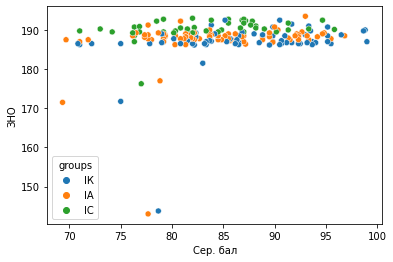

In [10]:
sns.scatterplot(x='Сер. бал', y='score', data=merged, hue='groups')
plt.ylabel("ЗНО")

Как видим, на графики есть выборсы - студенты, которых перевели с контракта на бюджет из-за наличия свободных мест. Эти выборсы обрежем

In [11]:
merged_cut = merged[merged['score'] > 183]

Text(0, 0.5, 'ЗНО')

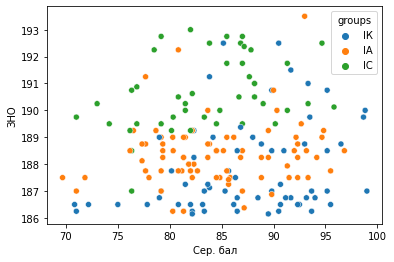

In [12]:
sns.scatterplot(x='Сер. бал', y='score', data=merged_cut, hue='groups')
plt.ylabel("ЗНО")

Как видим, все точки распределены равномерно, то есть нет никакой зависимости между баллов ЗНО и баллом на сессии в университете на этой специальности.

Проделаем те же действия для 121-й специальности этого факультета

In [13]:
rating_121 = pd.read_excel('rating_121.xlsx')

In [14]:
rating_121

,ПІБ,Група,Код спец.,Сер. бал,Дод. бал,Рейтинг *
0,Гордуз Олександр Сергійович,ІТ-03,121,99.33,NaN,94.37
1,Макаров Ілля Сергійович,ІТ-02,121,99.33,NaN,94.37
2,Куксюк Владислав Ігорович,ІТ-03,121,99.17,NaN,94.21
3,Ящук Денис Андрійович,ІТ-04,121,98.67,NaN,93.73
4,Гавриленко Ян Сергійович,ІТ-04,121,98.50,NaN,93.58
...,...,...,...,...,...,...
129,Чуєнко Дмитро Віталійович,ІП-04,121,72.50,NaN,68.88
130,Зеленський Олександр Васильович,ІП-01,121,72.17,NaN,68.56
131,Кльова Микола Михайлович,ІТ-04,121,72.17,NaN,68.56
132,Глущенко Олександр Володимирович,ІП-02,121,71.17,NaN,67.61


In [15]:
rating_121['surname'] = rating_121['ПІБ'].apply(lambda x: x.split(" ")[0])

In [16]:
zno_121 = pd.read_csv('zno_121.csv', header=None)
zno_121['name'] = zno_121[0].apply(lambda x: x.strip())
zno_121.drop(0, axis=1, inplace=True)
zno_121.columns = ['score', 'name']
zno_121['surname'] = zno_121.name.apply(lambda x: x.split(" ")[0])

In [17]:
merged_121 = rating_121.merge(zno_121, on='surname')[['ПІБ', 'Група', 'Сер. бал', 'score']]
merged_121['groups'] = merged_121['Група'].apply(lambda x: x.split('-')[0])
merged_121_cut = merged_121[merged_121['score'] > 188]

Text(0, 0.5, 'ЗНО')

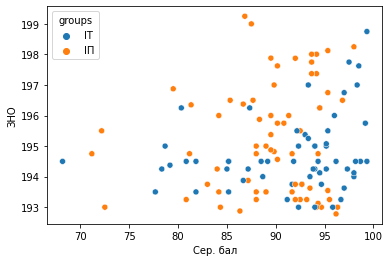

In [18]:
sns.scatterplot(x='Сер. бал', y='score', data=merged_121_cut, hue='groups')
plt.ylabel("ЗНО")

Со 121-й специальностью систуация аналогична.